In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_excel('ICICIBANK - Modified.xlsx',index_col='Date',parse_dates=True)

In [3]:
#Data cleaning
dataset.isna().any()
dataset = dataset.dropna()
print(dataset.shape)

(4054, 6)


In [4]:
training_set = dataset[0:3500]
test_set = dataset[3501:4054]

In [5]:
# Feature Scaling Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [8]:
print(X_train.shape,y_train.shape)

(1198, 60, 1) (1198,)


In [10]:
#Building the RNN LSTM model
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
#Using TensorFlow backend.

Using TensorFlow backend.


In [11]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0079
Epoch 2/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0013
Epoch 3/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0011
Epoch 4/100
1198/1198 [==============================] - 8s 7ms/step - loss: 9.3904e-04
Epoch 5/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0010
Epoch 6/100
1198/1198 [==============================] - 8s 7ms/step - loss: 9.6977e-04
Epoch 7/100
1198/1198 [==============================] - 8s 7ms/step - loss: 8.3842e-04
Epoch 8/100
1198/1198 [==============================] - 8s 7ms/step - loss: 8.2691e-04
Epoch 9/100
1198/1198 [==============================] - 8s 7ms/step - loss: 7.8979e-04
Epoch 10/100
1198/1198 [==============================] - 8s 7ms/step - loss: 8.0799e-04
Epoch 11/100
1198/1198 [==============================] - 8s 7ms/step - loss: 6.7049e-04
Epoch 12/100
1198/1198 [====================

1198/1198 [==============================] - 8s 7ms/step - loss: 4.1108e-04
Epoch 94/100
1198/1198 [==============================] - 8s 7ms/step - loss: 3.4916e-04
Epoch 95/100
1198/1198 [==============================] - 8s 7ms/step - loss: 4.3509e-04
Epoch 96/100
1198/1198 [==============================] - 8s 7ms/step - loss: 5.4262e-04
Epoch 97/100
1198/1198 [==============================] - 8s 7ms/step - loss: 3.5528e-04
Epoch 98/100
1198/1198 [==============================] - 8s 7ms/step - loss: 3.4585e-04
Epoch 99/100
1198/1198 [==============================] - 8s 7ms/step - loss: 3.2589e-04
Epoch 100/100
1198/1198 [==============================] - 8s 7ms/step - loss: 3.4563e-04


In [12]:
# Getting the real stock price of 2019
dataset_test = pd.read_csv('valid_set_modified1.csv',index_col="Date",parse_dates=True)

In [13]:
# Getting the predicted stock price

dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
dataset_total.shape

(4076,)

In [14]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs.shape

(82,)

In [15]:
inputs = inputs.reshape(-1,1)
inputs.shape

(82, 1)

In [16]:
inputs = sc.fit_transform(inputs)

In [17]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [18]:
dataset_test.Open.values.shape

(22,)

[]

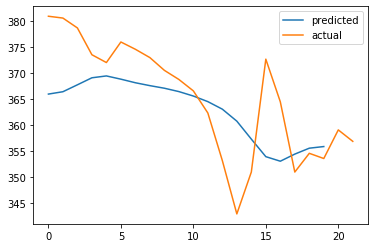

In [19]:
plt.plot(predicted_stock_price, label = "predicted")
plt.plot(dataset_test.Open.values, label = "actual")
plt.legend()
plt.plot()

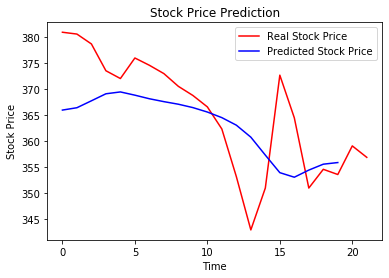

In [20]:
# Visualising the results
plt.plot(dataset_test.Open.values, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [21]:
def MAE(predictions, actual):
    abs_err = [abs(prediction - actualVal) for prediction, actualVal in zip(predictions,actual)]
    mae = sum(abs_err)/len(actual)
    print("MAE =" , mae)
    return mae

def rmse(predictions, targets):
    return print("RMSE =", np.sqrt(((predictions - targets) ** 2).mean()))

In [22]:
MAE(predicted_stock_price,dataset_test.Open.values)
rmse(predicted_stock_price, dataset_test.Open.values)

MAE = [6.6328626]
RMSE = 12.374721786599638


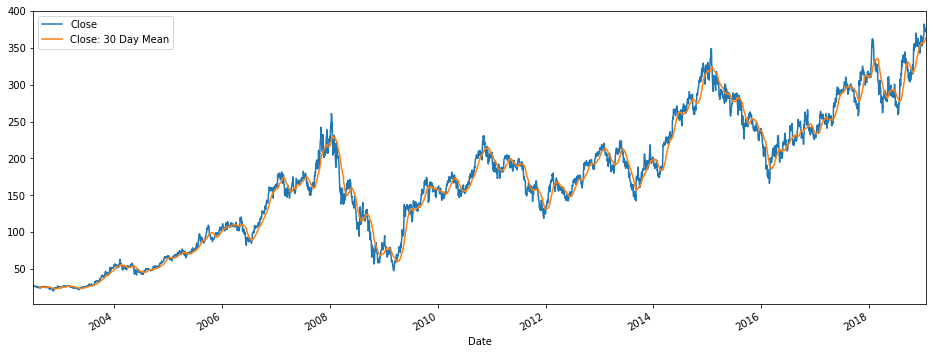

In [23]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

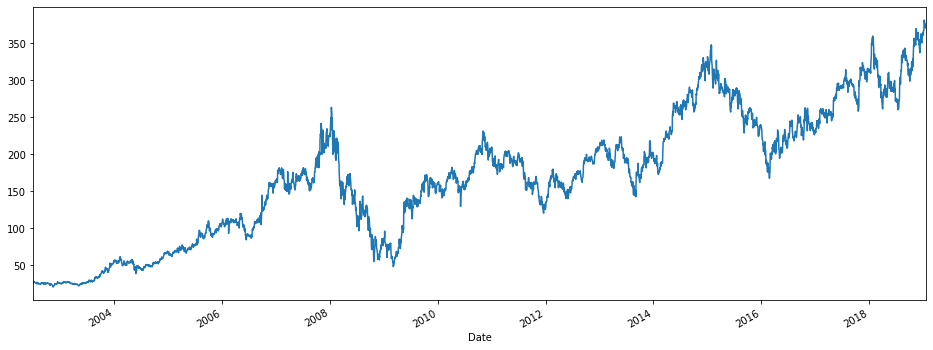

In [24]:
dataset['Open'].plot(figsize=(16,6))